# Traveling salesman with GA 

### Module Import

In [17]:
import numpy as np
import matplotlib as plt
 #notebook or inline 
%matplotlib inline
plt.rcParams["figure.figsize"]=(16,8)
from math import sqrt
from random import randint

#For some cool widgets
from ipywidgets import FloatProgress
from IPython.display import display


### Read the cities file

200 cities read


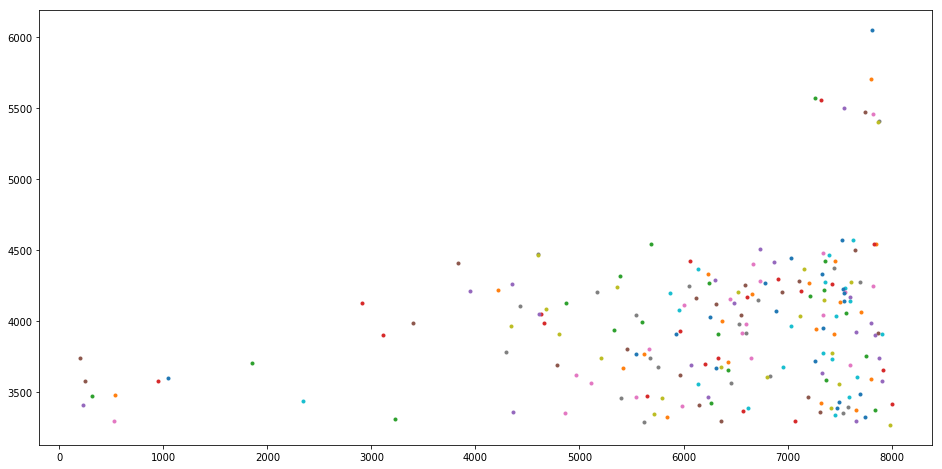

In [18]:
city_list=np.loadtxt('200.txt').astype(int)
print(str(len(city_list)) + " cities read")
#show the map
for city in city_list:
    plt.pyplot.plot(city[1],city[2],'.')
plt.pyplot.show()

### Set the initial parameters

In [19]:
nindividuals=1000
ncities=len(city_list)
cx_probability=0.9
mx_probability=0.1
max_iterations=750

## Define general funtions

### Euclidean Distance

In [20]:
def euclidian_distance(x1,y1,x2,y2):
    dist= sqrt((x1-x2)**2+(y1-y2)**2)
    return dist

In [21]:
euclidian_distance(0,0,1,1)

1.4142135623730951

### Calculate fitness

In [22]:
def calculate_fitness(individual):
    fitness=0
    #First element
    fitness=euclidian_distance(city_list[individual[0]][1],city_list[individual[0]][2],
                               city_list[individual[1]][1],city_list[individual[0]][2])
    for i in range(1,len(individual)-1):
        fitness=fitness+euclidian_distance(city_list[individual[i]][1],city_list[individual[i]][2],
                                           city_list[individual[i+1]][1],city_list[individual[i+1]][2])
    return fitness

### Mutation

In [23]:
def mutate(individual):
    #reverse mutation
    init_pos=np.random.randint(0,len(individual))
    end_pos=np.random.randint(init_pos,len(individual)+1)
    mutated_individual= np.concatenate((individual[:init_pos],
                                        individual[init_pos:end_pos][::-1],
                                        individual[end_pos:]),axis=0)
    return mutated_individual

### Crossover

   static int[][] cyclecrossover(int splitpoint, int[] p1, int[] p2){
       int[][] result = new int[2][nhouses];
       for(int i=0;i<nhouses;i++){
           result [0][i]=-1;
           result [1][i]=-1;
       }

       int currpos=splitpoint;
       int newpos=0;
       int firstval=p1[splitpoint];
       boolean cycleover=false;
       do{
           
           result [0][currpos]=p2[currpos];
           result [1][currpos]=p1[currpos];
           //usar o 2º valor 
           newpos=sequentialSearch(p1, p2[currpos]);
           if (firstval==p2[currpos]){
                cycleover=true;
           }
           currpos=newpos;

       }while (cycleover==false);
       
       //preencher os imutados
       for(int i=0;i<nhouses;i++){
           if (result [0][i]==-1){
            result [0][i]=p1[i];
            result [1][i]=p2[i];
           }
       }       
       
       return result;
   }  

### Tournament Selection

In [24]:
def tournament_selection(pop, tournament_size):
    
    champion=population[np.random.randint(len(pop))]
    champion_fitness=calculate_fitness(champion)
    
    for i in range(0,tournament_size):
        tmpind=population[np.random.randint(len(pop))]
        tmpind_fitness=calculate_fitness(tmpind)
        if tmpind_fitness<champion_fitness:
            champion=tmpind[:]
            champion_fitness=tmpind_fitness
    return champion

### Initialization

In [25]:
population=np.zeros((nindividuals,ncities),dtype=int)
for individual in range(0,nindividuals):
    population[individual]=np.arange(ncities)
    np.random.shuffle(population[individual])

In [26]:
population

array([[ 60,  52,  95, ..., 110, 145, 162],
       [ 17, 156,  86, ..., 129,  50, 154],
       [147, 107,  83, ...,  60,   8,  89],
       ..., 
       [ 10,  55, 135, ..., 123, 120, 124],
       [  7,  61, 136, ...,  38,  34, 156],
       [ 93, 159,  21, ...,  56,   4, 104]])

In [27]:
def draw_scatter_plot():
    ##prepare scatter
    xx=list()
    xx[:]=()
    yy=list()
    yy[:]=()

    best_individual=0
    best_individual_fitness= calculate_fitness(population[0])

    tot=0
    
    for i in range(0,nindividuals):
        cfit=calculate_fitness(population[i])
        tot=tot+cfit
        if cfit<best_individual_fitness:
            best_individual=i
            best_individual_fitness=calculate_fitness(population[i])


    for i in population[best_individual]:
        xx.append(city_list[i][1])
        yy.append(city_list[i][2])

    print("Best individual is number " + str(best_individual) + " with a fitness of " + str(best_individual_fitness))
    print("Average fitness is " + str(tot/len(population)))

    plt.pyplot.scatter(xx,yy,c='r',marker='o')
    plt.pyplot.plot(xx,yy)
    plt.pyplot.show()

Best individual is number 663 with a fitness of 332277.53794730187
Average fitness is 376277.49616875796


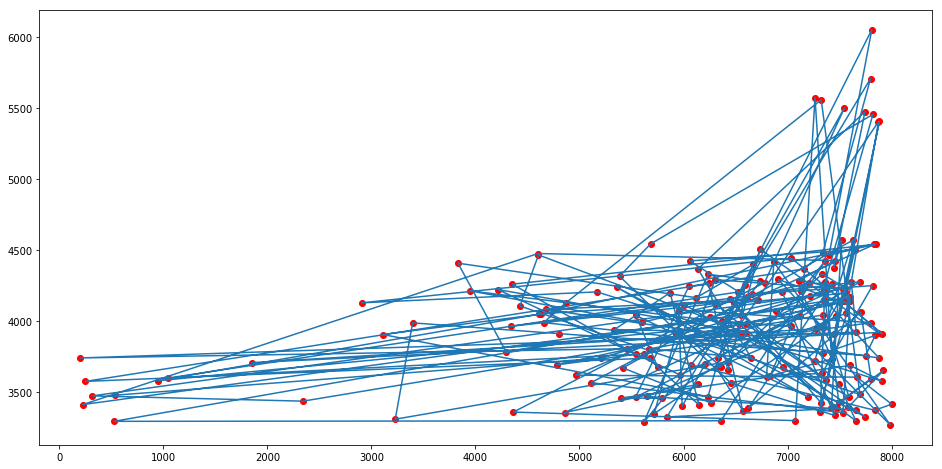

In [28]:
draw_scatter_plot()

In [29]:
x=[3,4,5,6]
sum(x)

18

FloatProgress(value=0.0, max=750.0)

Best individual is number 663 with a fitness of 332277.53794730187
Average fitness is 376277.49616875796


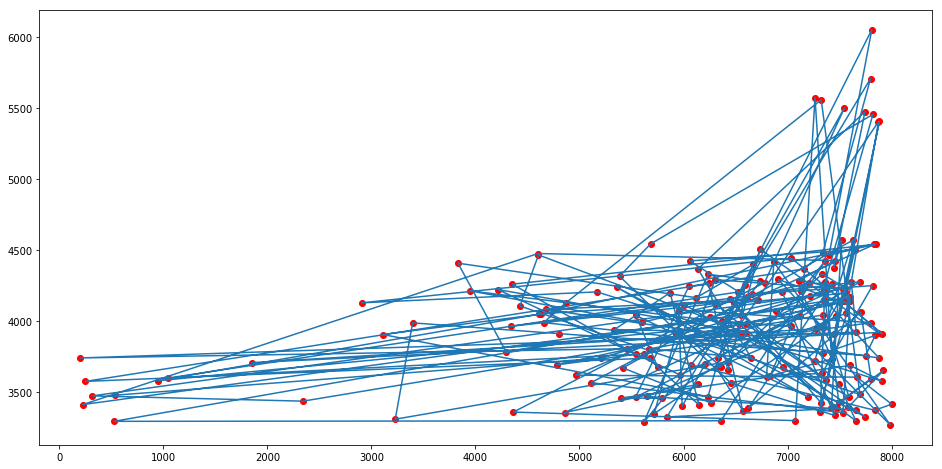

Best individual is number 500 with a fitness of 286886.5241736318
Average fitness is 296442.623962783


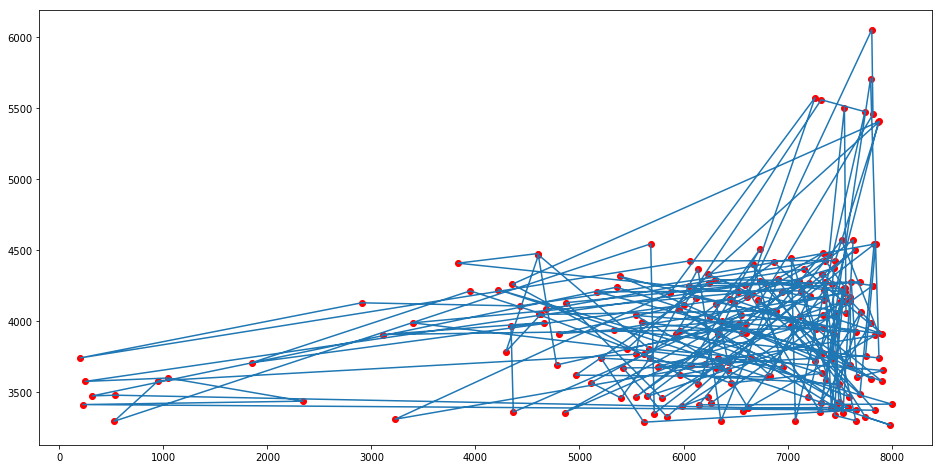

Best individual is number 207 with a fitness of 243588.78436248278
Average fitness is 256671.46884586176


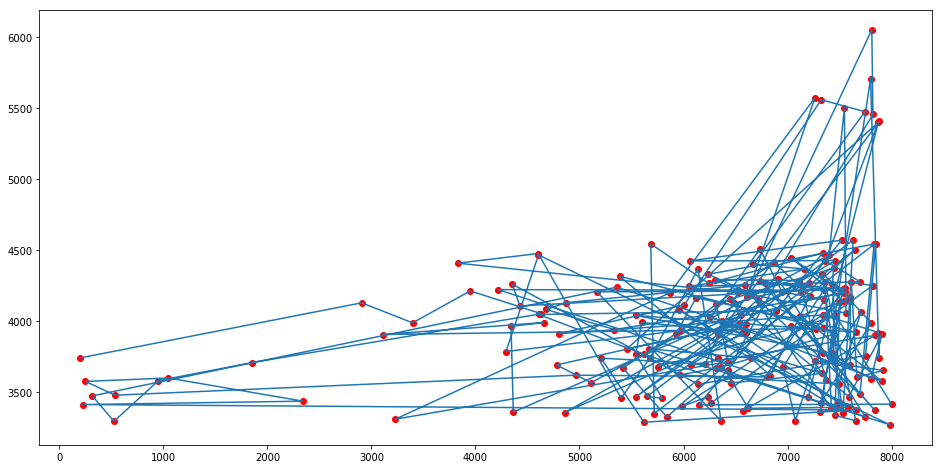

Best individual is number 425 with a fitness of 219064.30145161087
Average fitness is 226968.08177505998


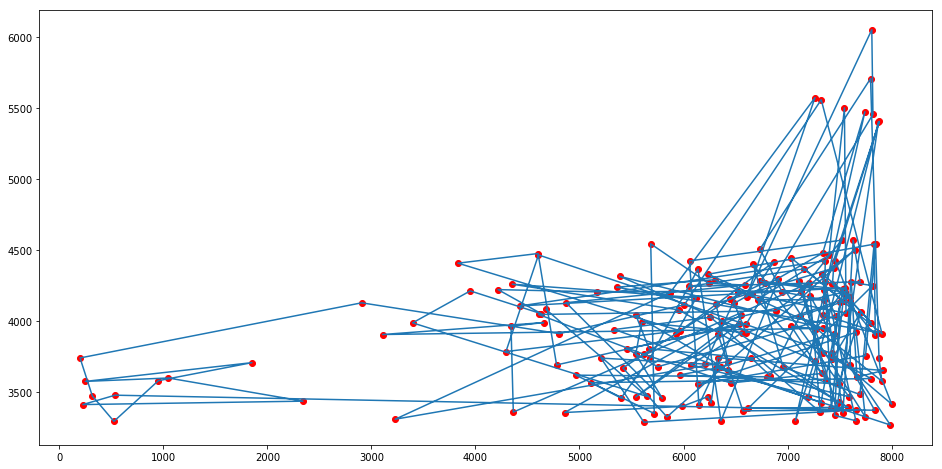

Best individual is number 32 with a fitness of 196042.11598521986
Average fitness is 203998.44166355996


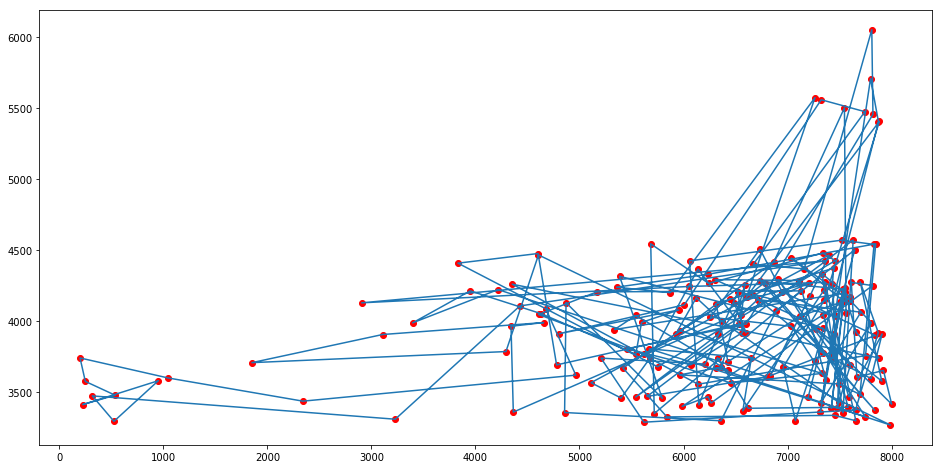

Best individual is number 883 with a fitness of 176190.89395977653
Average fitness is 185452.350188254


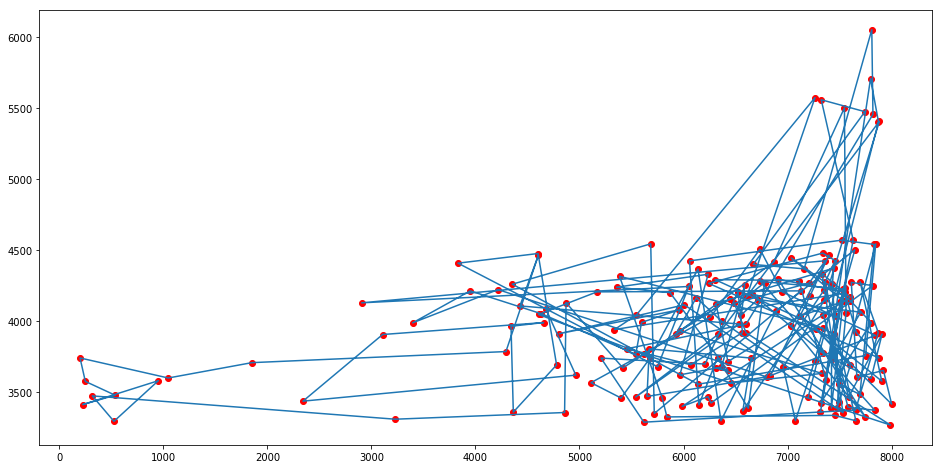

Best individual is number 645 with a fitness of 162254.8716939115
Average fitness is 167666.86105567173


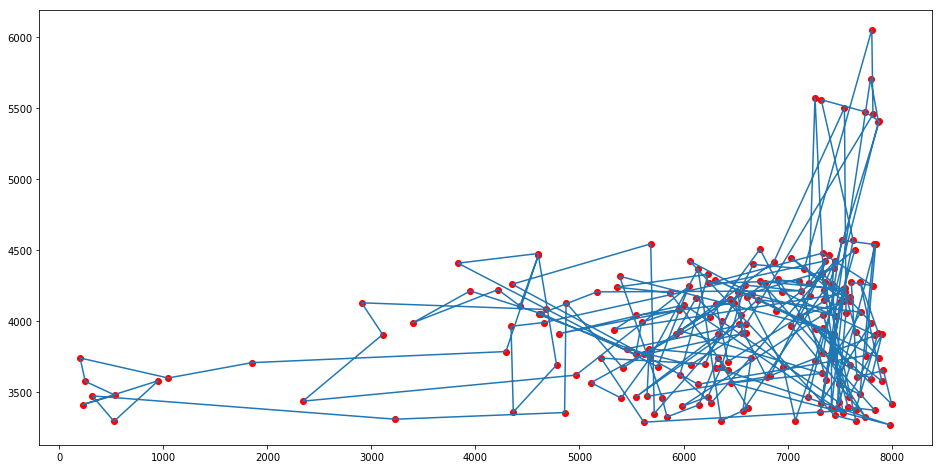

Best individual is number 150 with a fitness of 149744.09803208197
Average fitness is 156105.7634667161


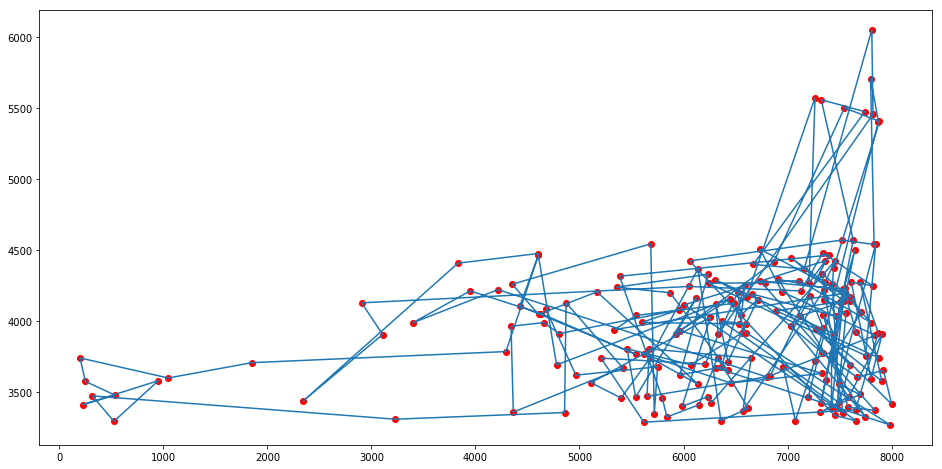

Best individual is number 841 with a fitness of 138902.62176576306
Average fitness is 144655.23483311333


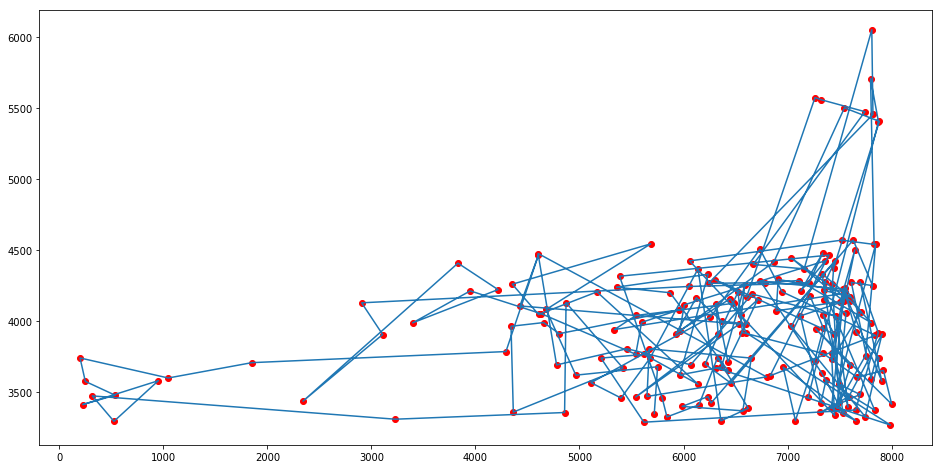

Best individual is number 581 with a fitness of 130854.82845039888
Average fitness is 135739.3376273662


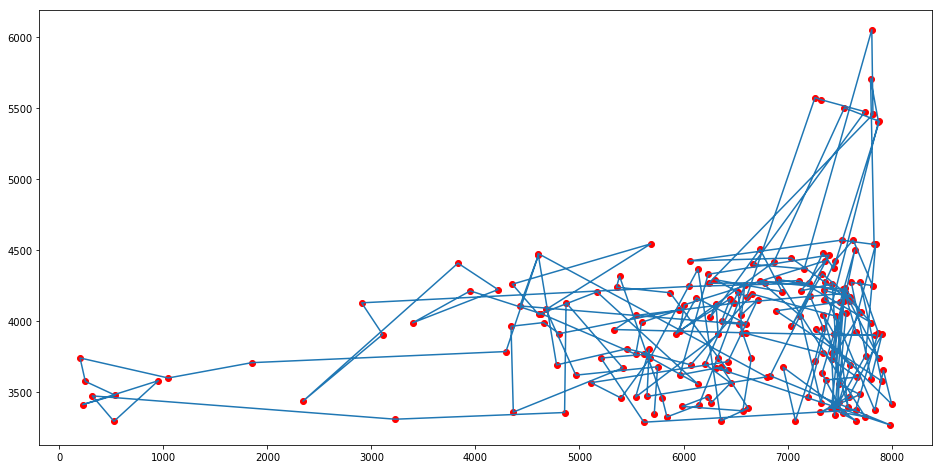

Best individual is number 983 with a fitness of 123139.67954093221
Average fitness is 128223.92226555447


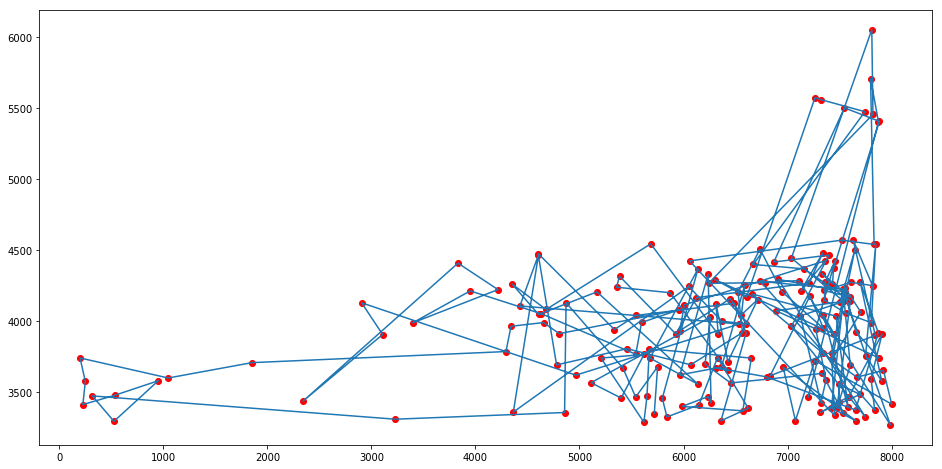

Best individual is number 149 with a fitness of 115835.89215233532
Average fitness is 121779.62978836718


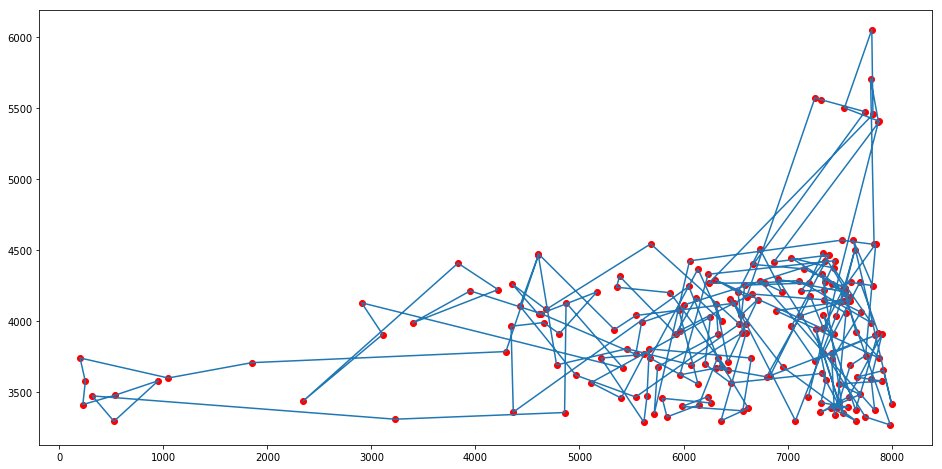

Best individual is number 711 with a fitness of 111448.64119155463
Average fitness is 116783.0029344068


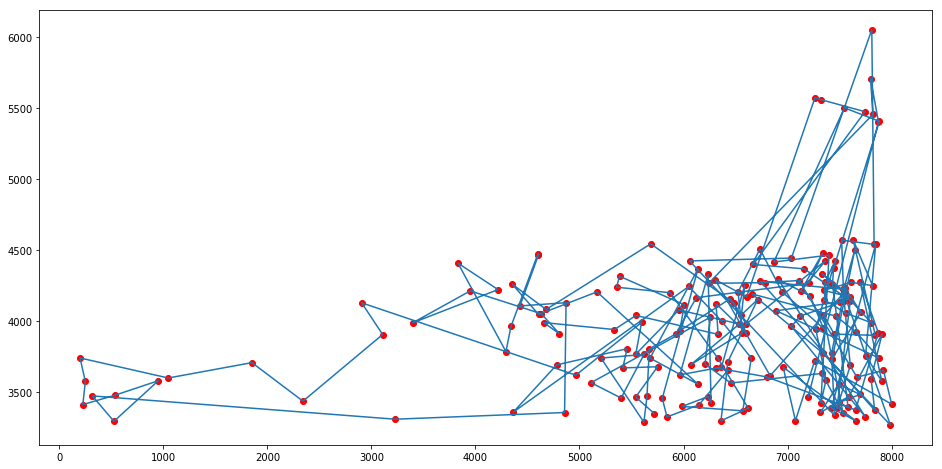

Best individual is number 937 with a fitness of 106551.6875127876
Average fitness is 111564.3726841284


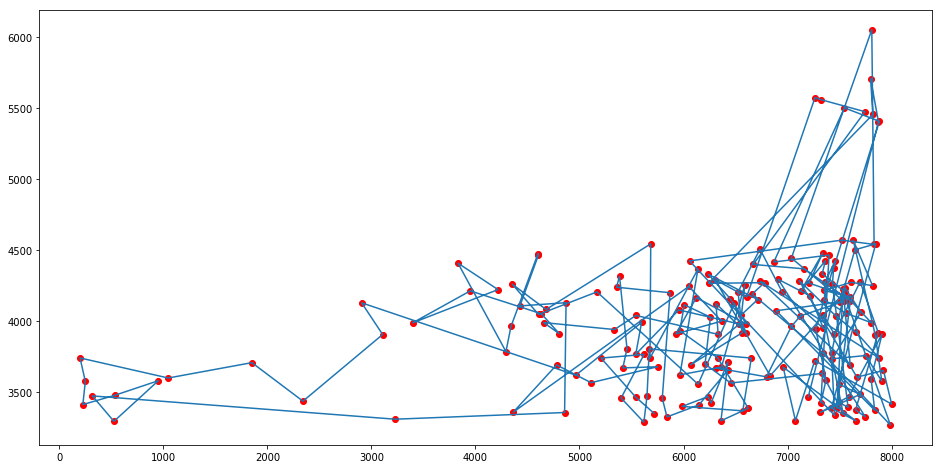

Best individual is number 469 with a fitness of 101138.67013070844
Average fitness is 105769.82939399772


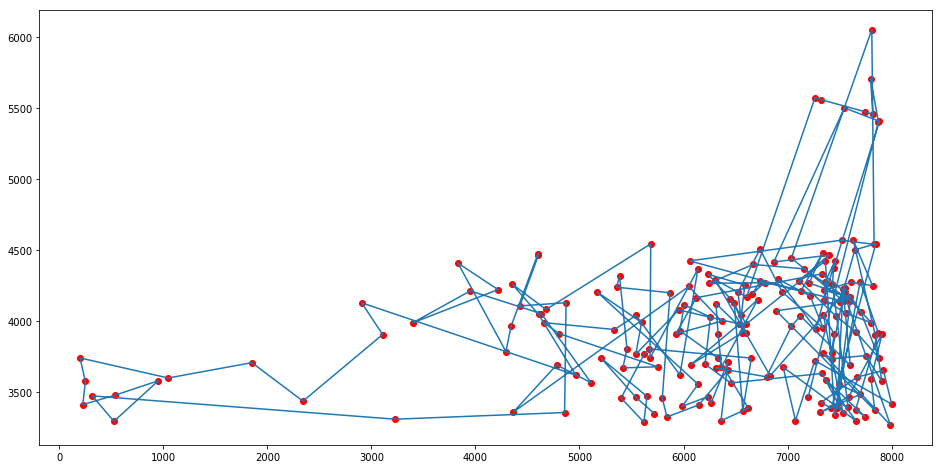

Best individual is number 684 with a fitness of 97177.04382616667
Average fitness is 102143.58750494065


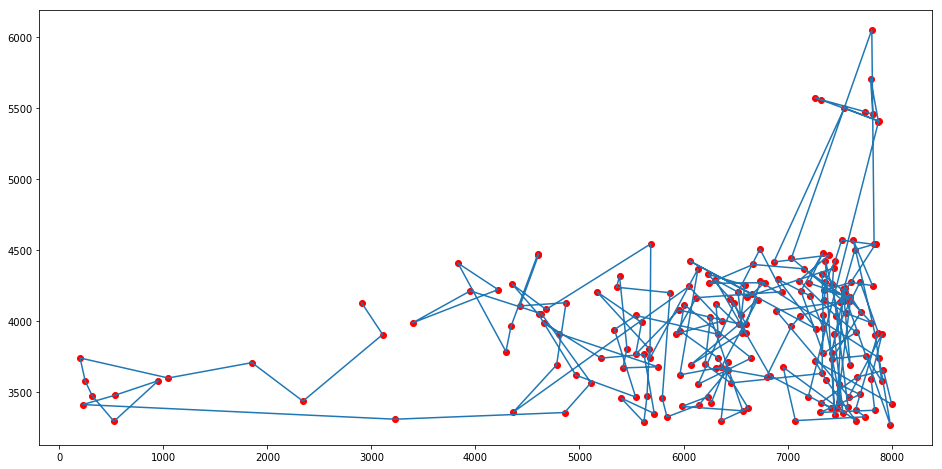

Best individual is number 772 with a fitness of 95384.35501776733
Average fitness is 99599.09252320444


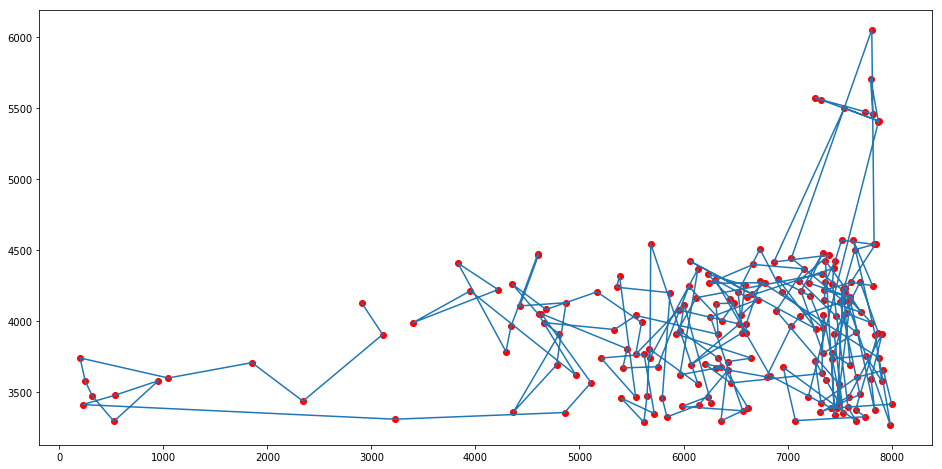

Best individual is number 825 with a fitness of 92632.2907964084
Average fitness is 97253.48380813807


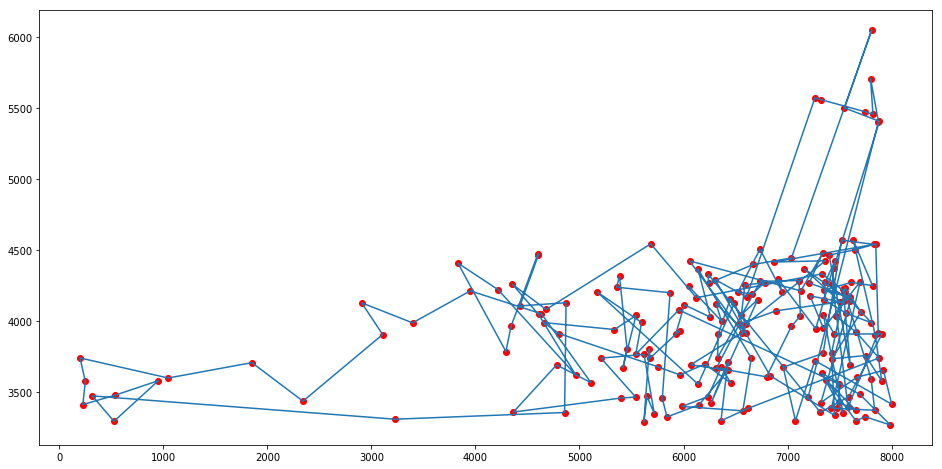

Best individual is number 731 with a fitness of 89674.01531294028
Average fitness is 94671.01817711761


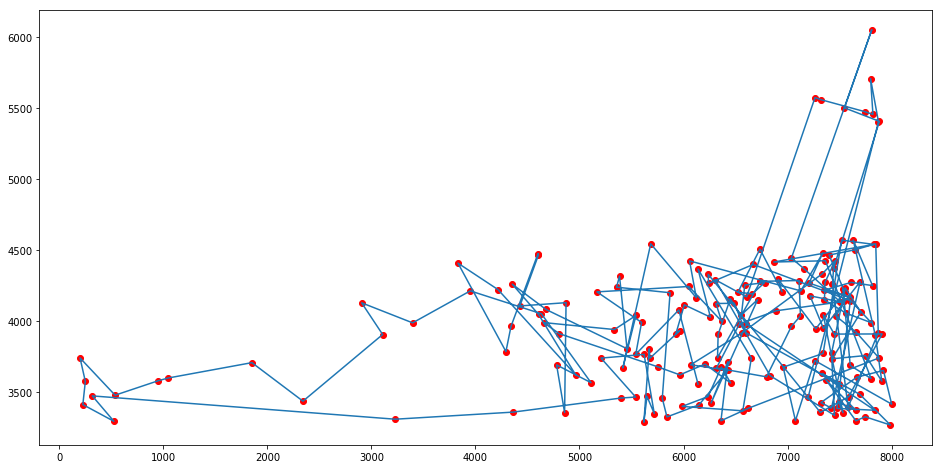

Best individual is number 972 with a fitness of 87299.32365870409
Average fitness is 91920.03589643938


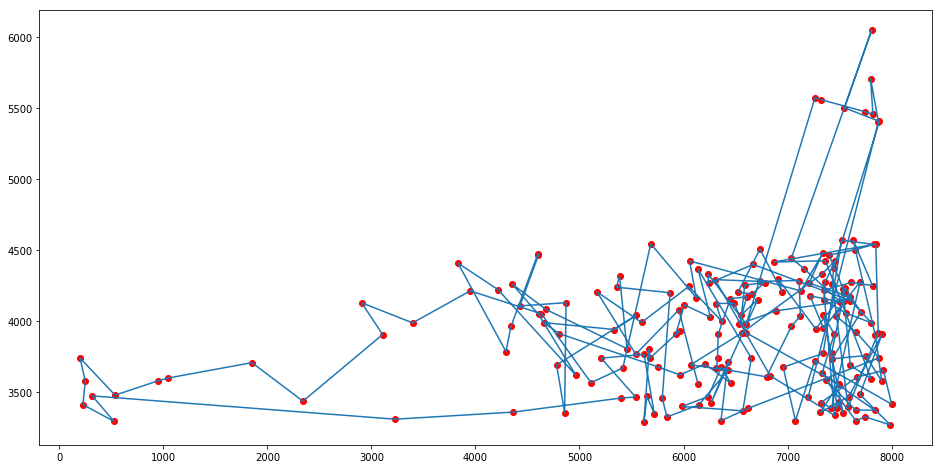

Best individual is number 377 with a fitness of 85700.01758690264
Average fitness is 89565.68642012341


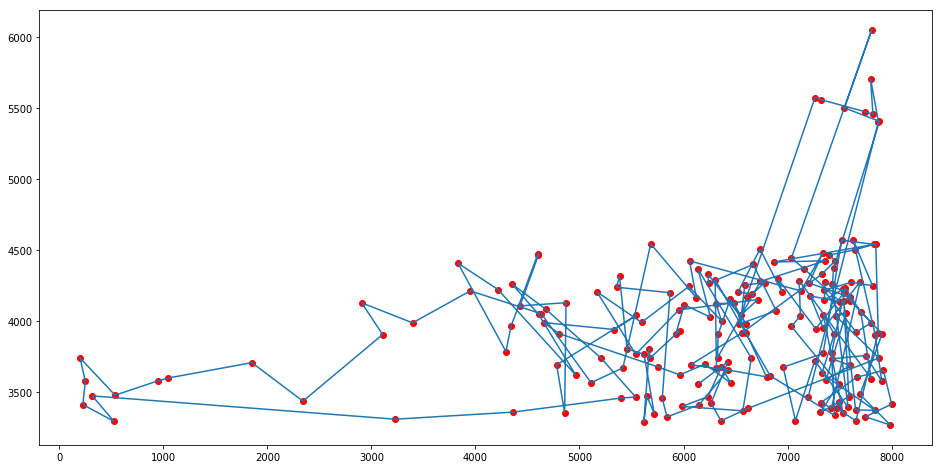

Best individual is number 658 with a fitness of 84461.91767880079
Average fitness is 88392.2422265997


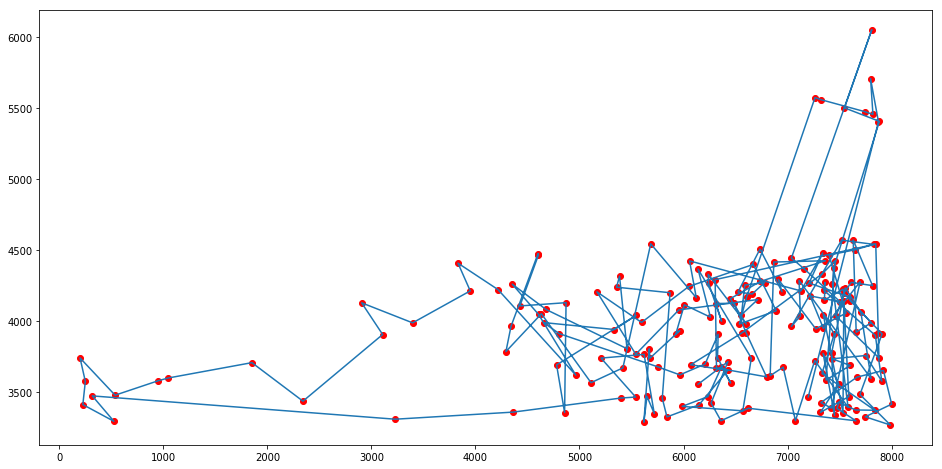

Best individual is number 953 with a fitness of 82422.70172887342
Average fitness is 86503.13087591279


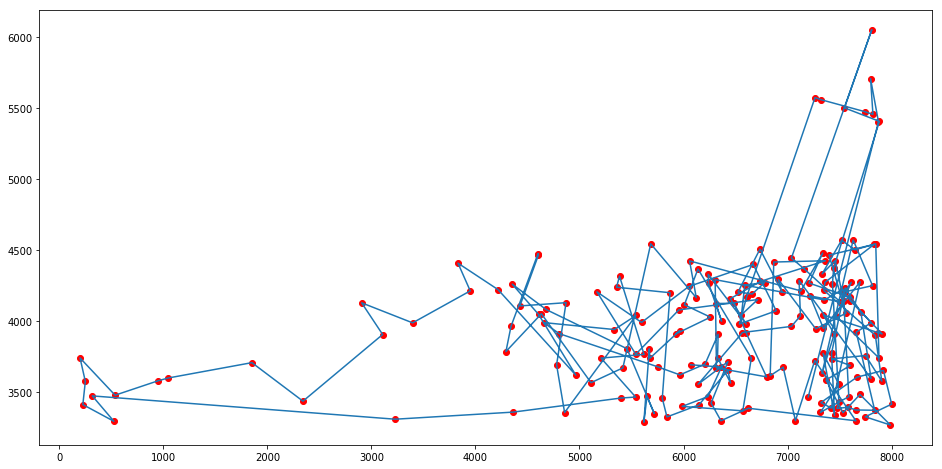

Best individual is number 375 with a fitness of 80127.35321633396
Average fitness is 84203.6973734939


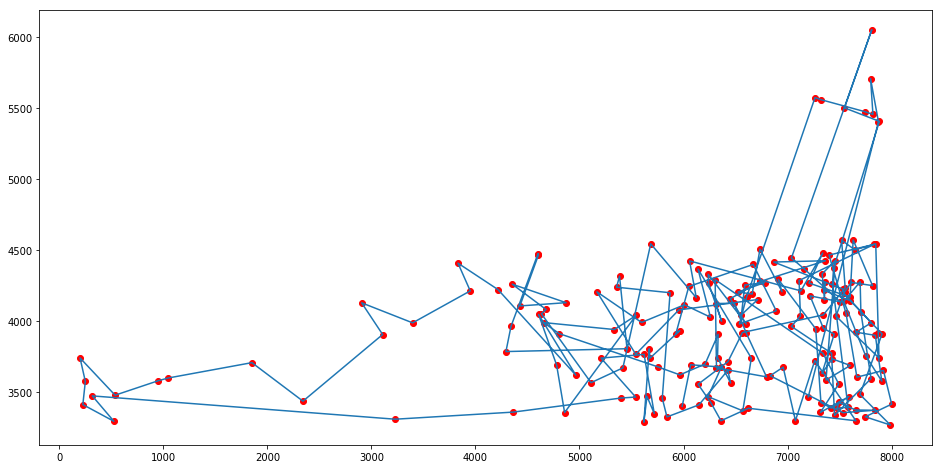

Best individual is number 923 with a fitness of 78243.37762870628
Average fitness is 82485.0879510985


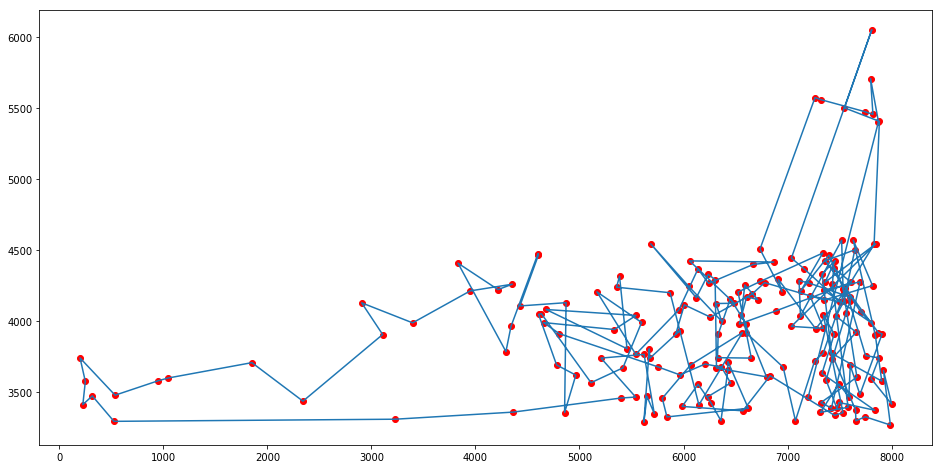

Best individual is number 751 with a fitness of 76816.4257883315
Average fitness is 80829.49417238946


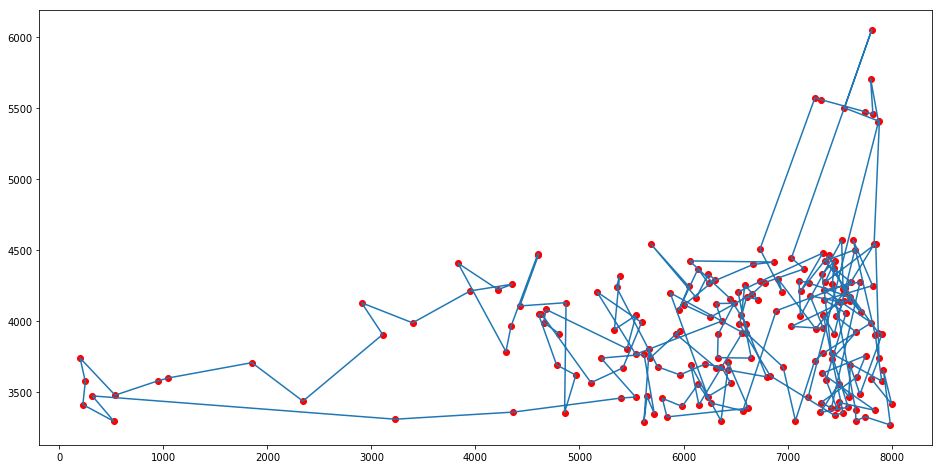

Best individual is number 384 with a fitness of 76302.7507570889
Average fitness is 80315.22281782309


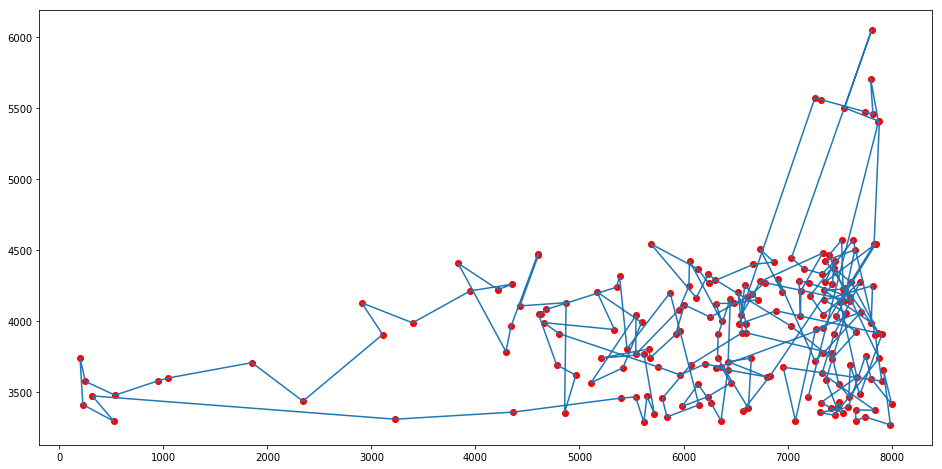

Best individual is number 225 with a fitness of 74830.5665119095
Average fitness is 79452.17192616253


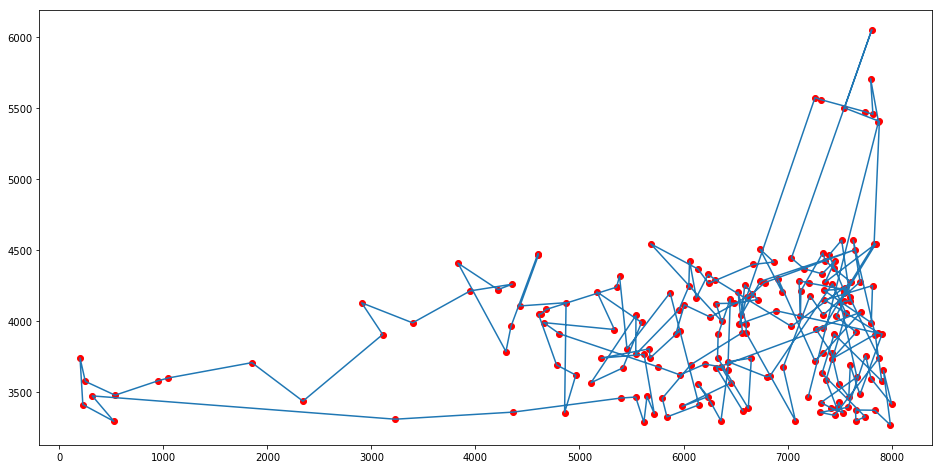

Best individual is number 142 with a fitness of 73835.19192778989
Average fitness is 78736.33286004887


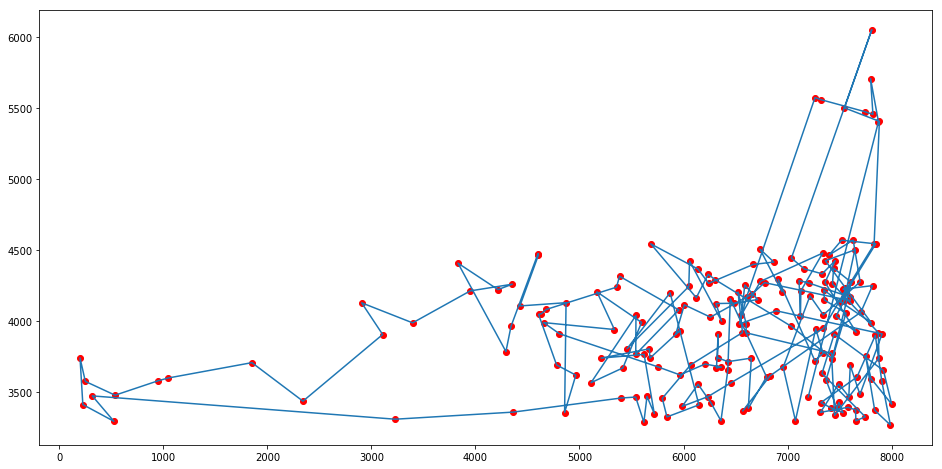

Best individual is number 411 with a fitness of 73203.99975213937
Average fitness is 77173.12174471773


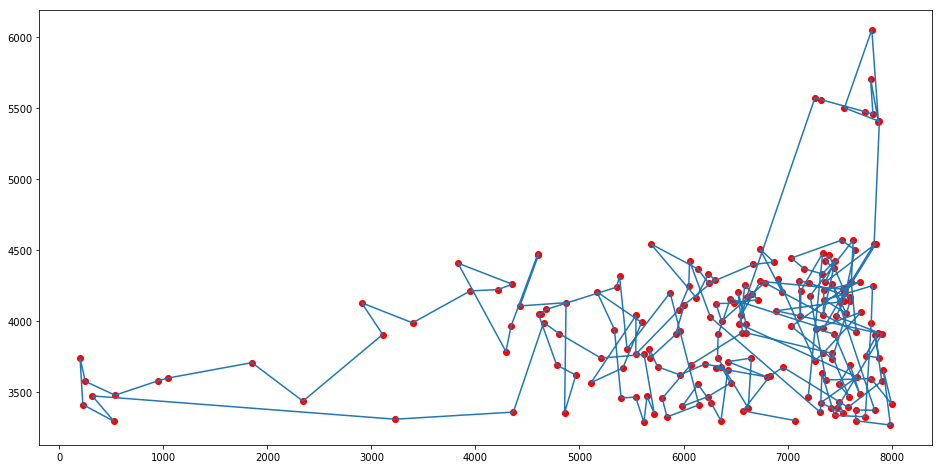

Best individual is number 862 with a fitness of 72228.83220163555
Average fitness is 76576.00909995307


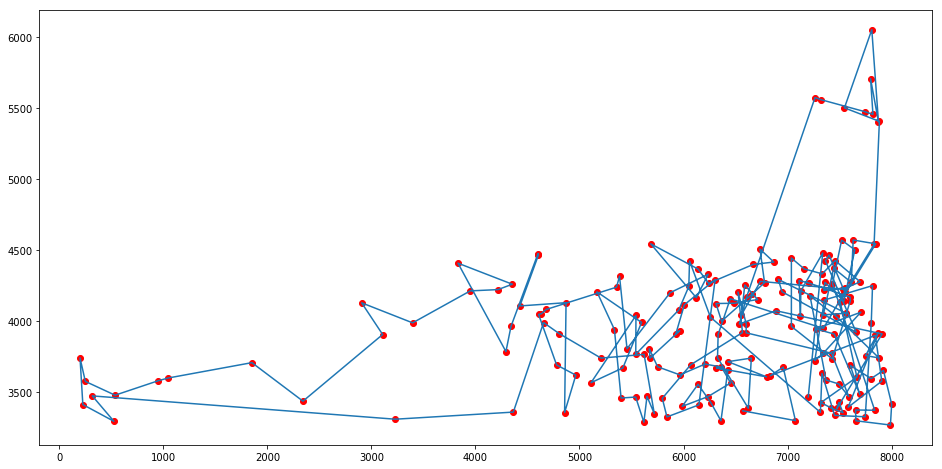

Best individual is number 174 with a fitness of 71187.17580937226
Average fitness is 75243.4011258783


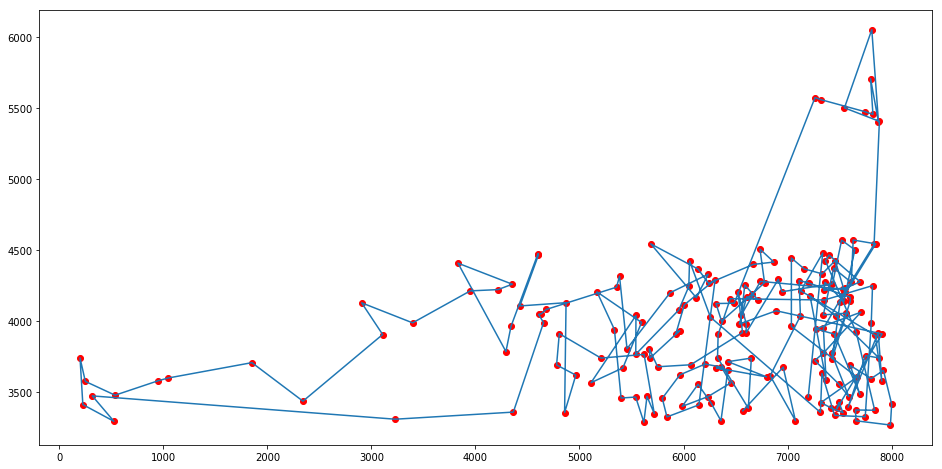

Best individual is number 43 with a fitness of 69760.76242161944
Average fitness is 73983.53383263388


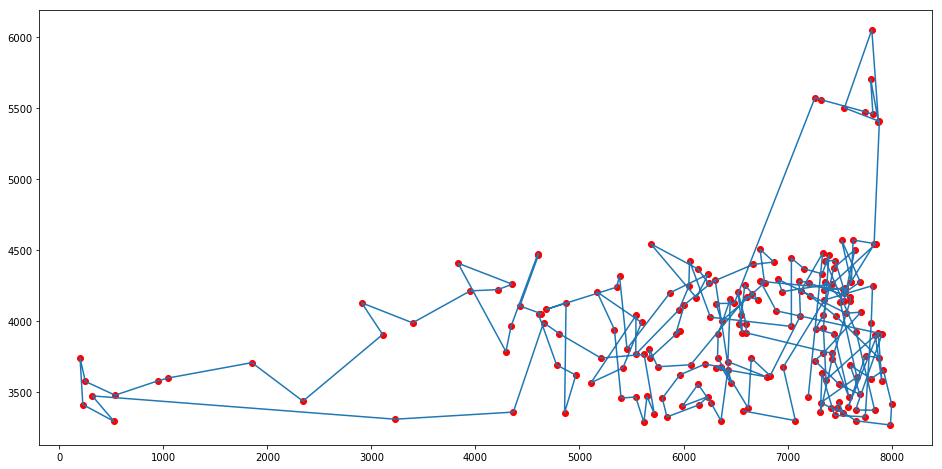

Best individual is number 673 with a fitness of 68909.54749743409
Average fitness is 73328.62335427204


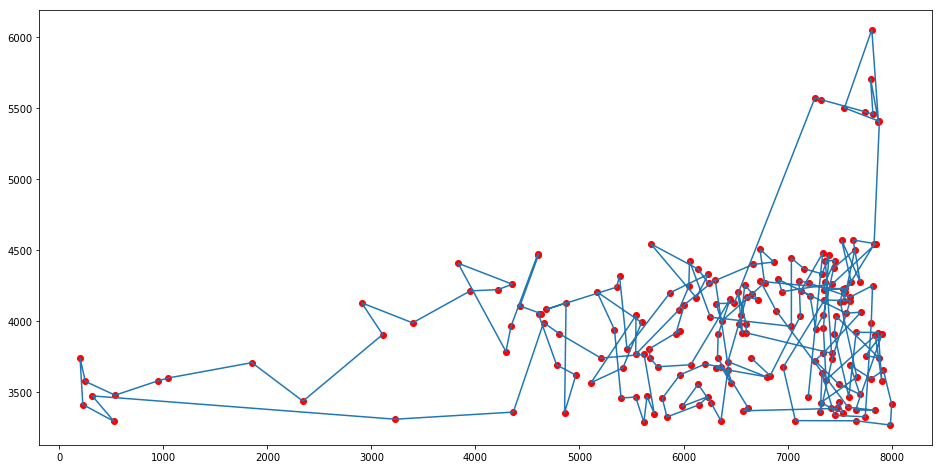

Best individual is number 330 with a fitness of 68416.38875748687
Average fitness is 72393.16789089084


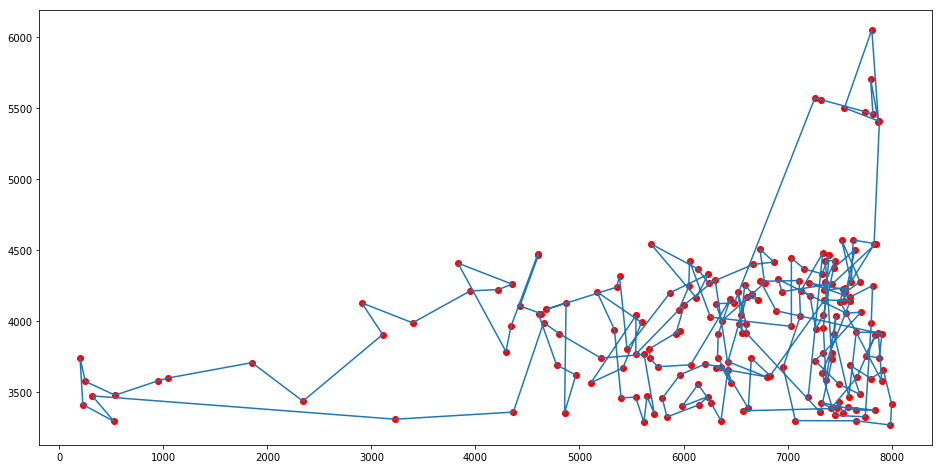

Best individual is number 594 with a fitness of 67206.57539640898
Average fitness is 71386.93140998115


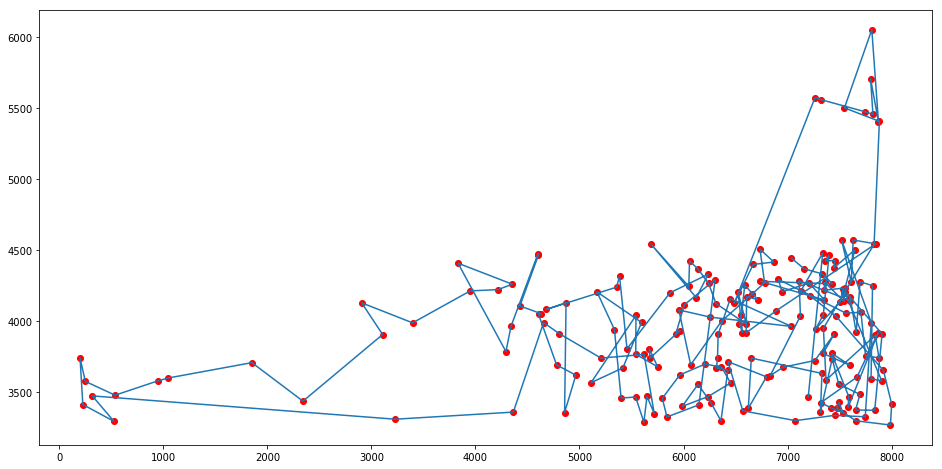

Best individual is number 60 with a fitness of 66143.43652720461
Average fitness is 70377.17611980064


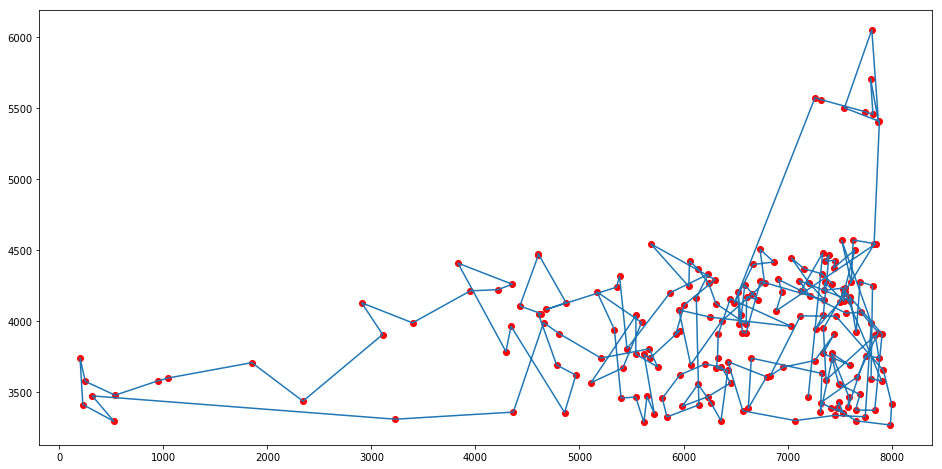

Best individual is number 888 with a fitness of 65432.41407224617
Average fitness is 69975.5875899148


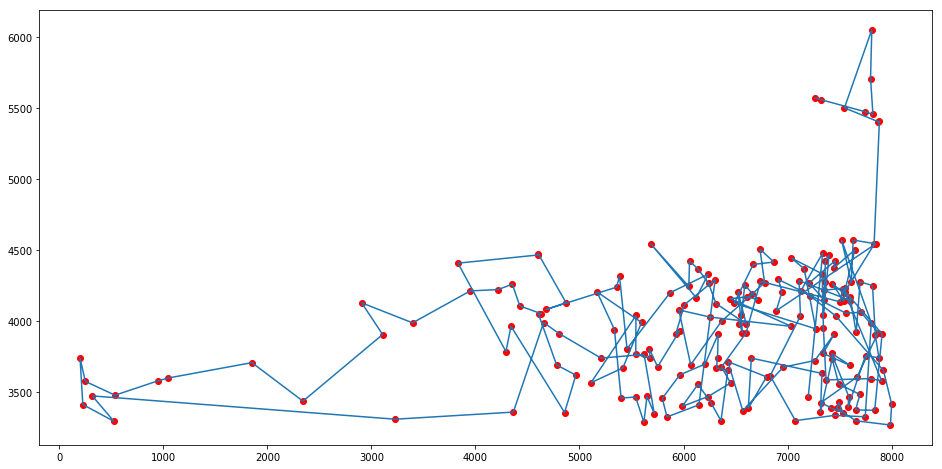

Best individual is number 881 with a fitness of 65228.443383095015
Average fitness is 69468.28882076268


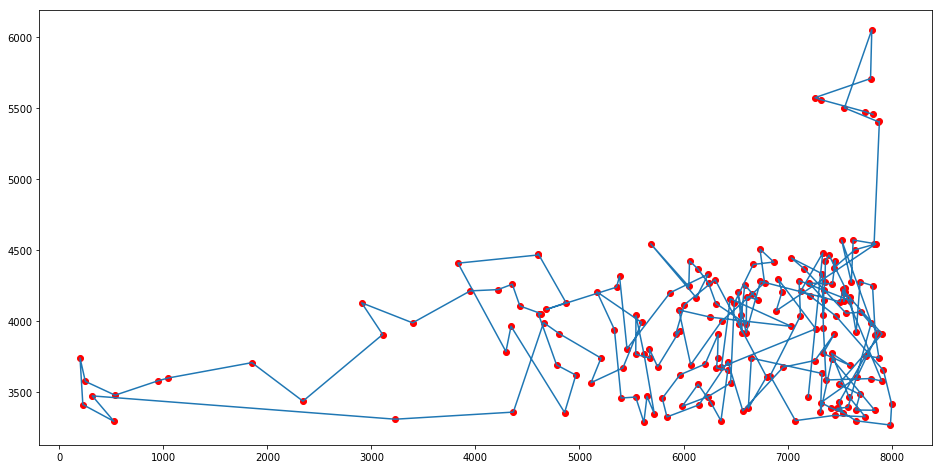

Best individual is number 42 with a fitness of 65314.34385775411
Average fitness is 69465.5438744473


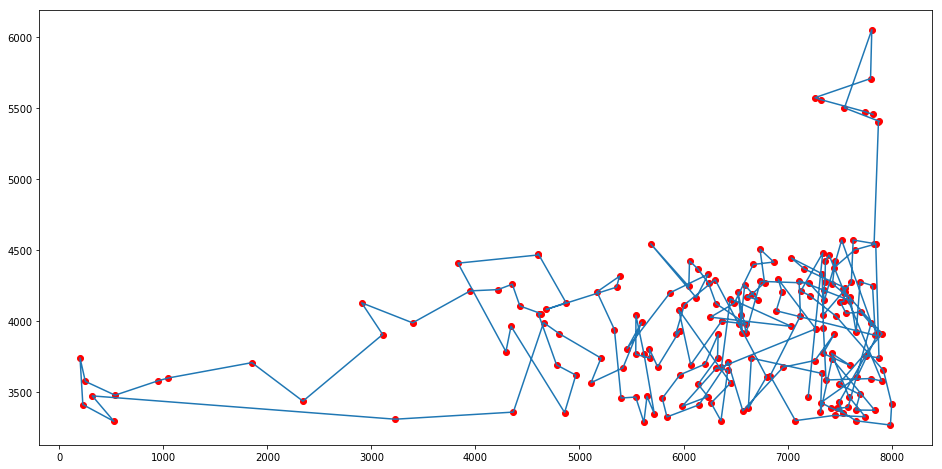

Best individual is number 22 with a fitness of 65424.191536587074
Average fitness is 69418.3513412799


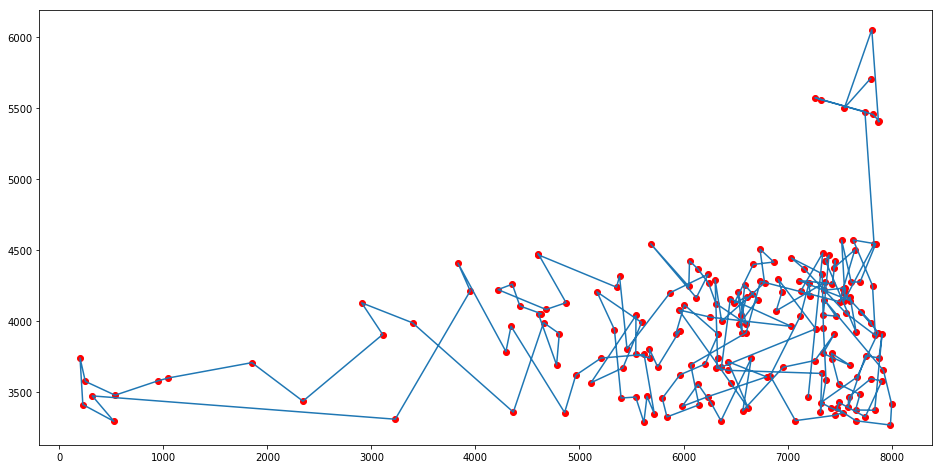

Best individual is number 313 with a fitness of 64983.25621205931
Average fitness is 68987.10645941456


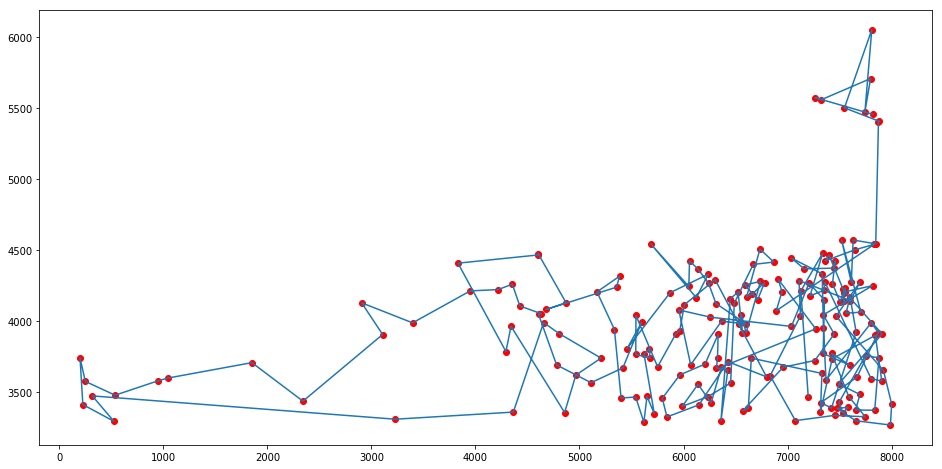

Best individual is number 895 with a fitness of 63629.172924590355
Average fitness is 68099.81735456434


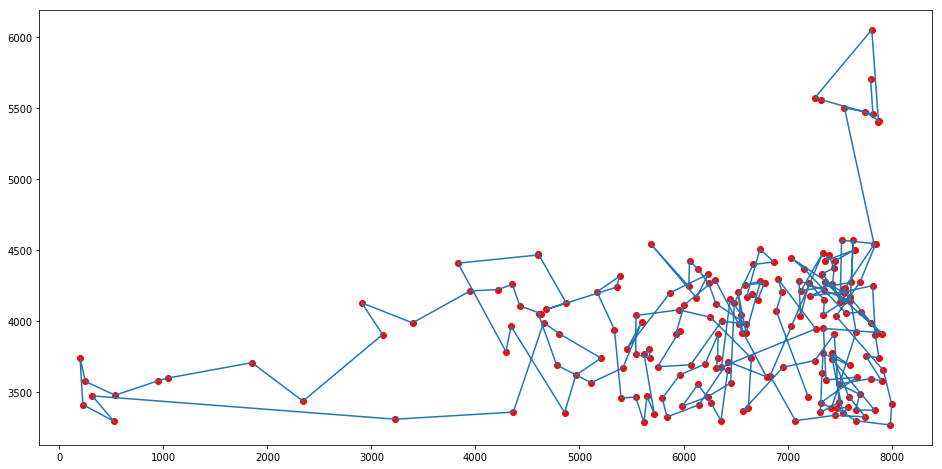

Best individual is number 296 with a fitness of 63082.63679873779
Average fitness is 67723.19733081636


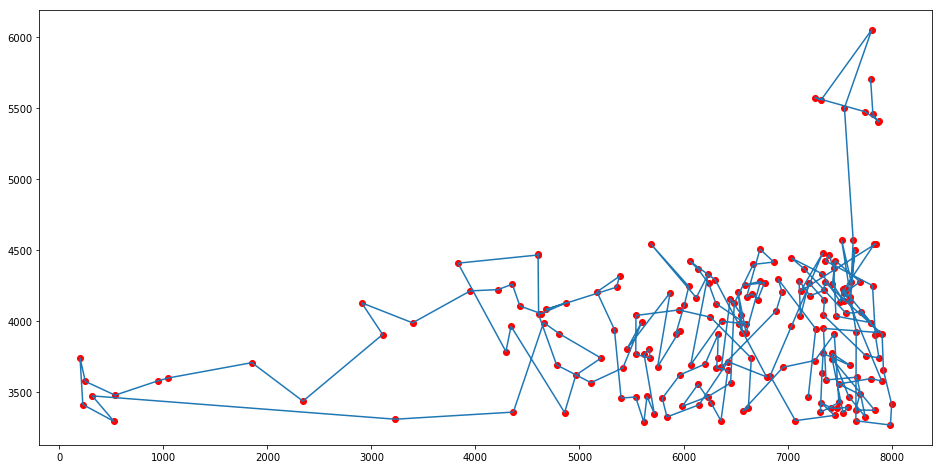

Best individual is number 608 with a fitness of 63000.11967832247
Average fitness is 67248.55637983751


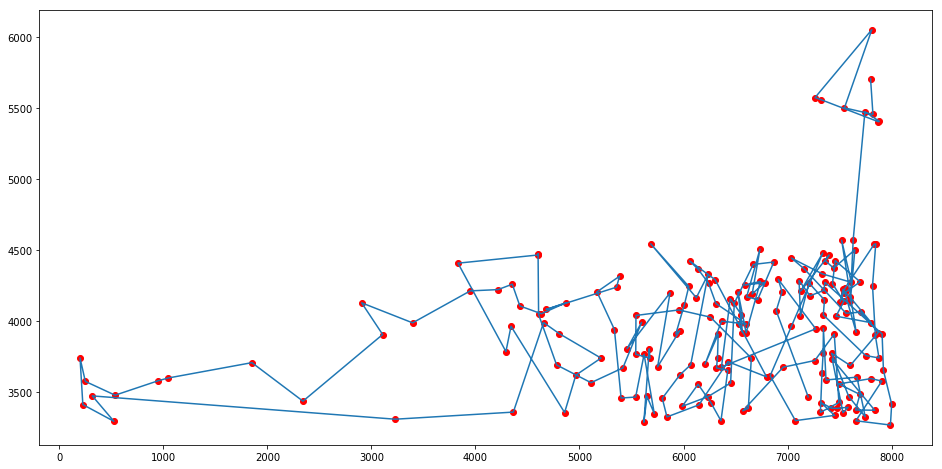

Best individual is number 414 with a fitness of 62686.21422076455
Average fitness is 66928.91474422226


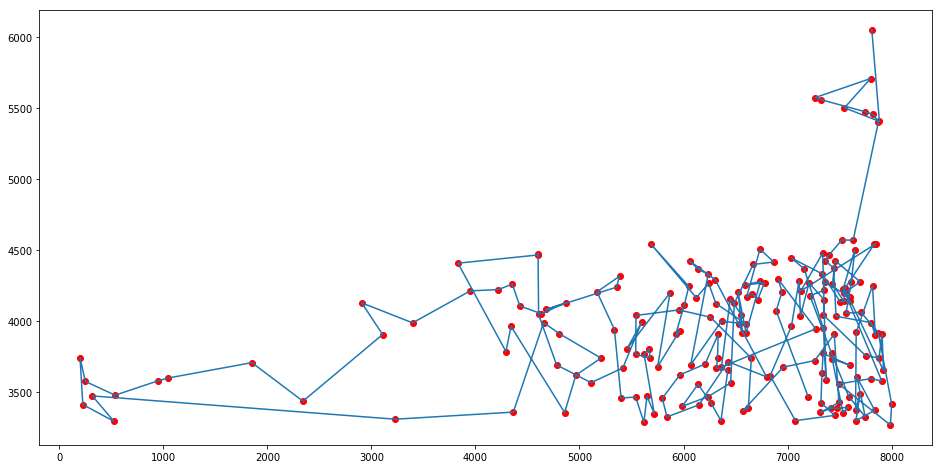

Best individual is number 690 with a fitness of 62603.66509036144
Average fitness is 66318.54714386023


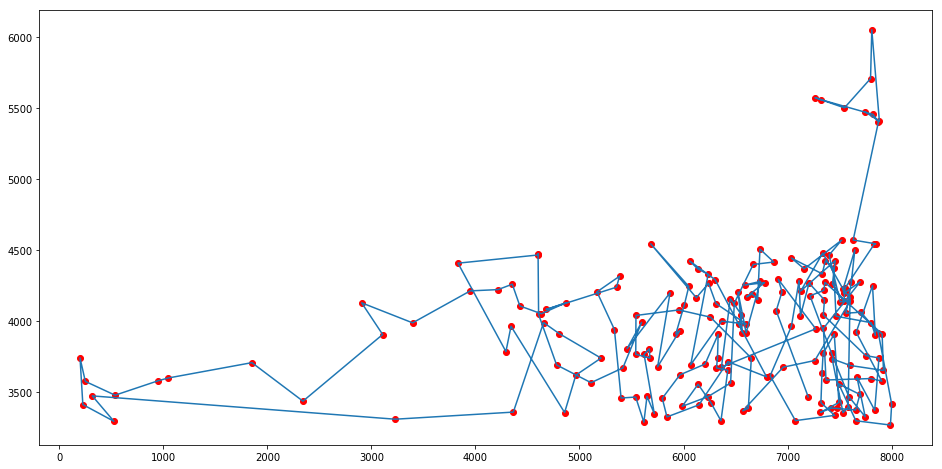

Best individual is number 43 with a fitness of 62669.03735843329
Average fitness is 66635.05341580031


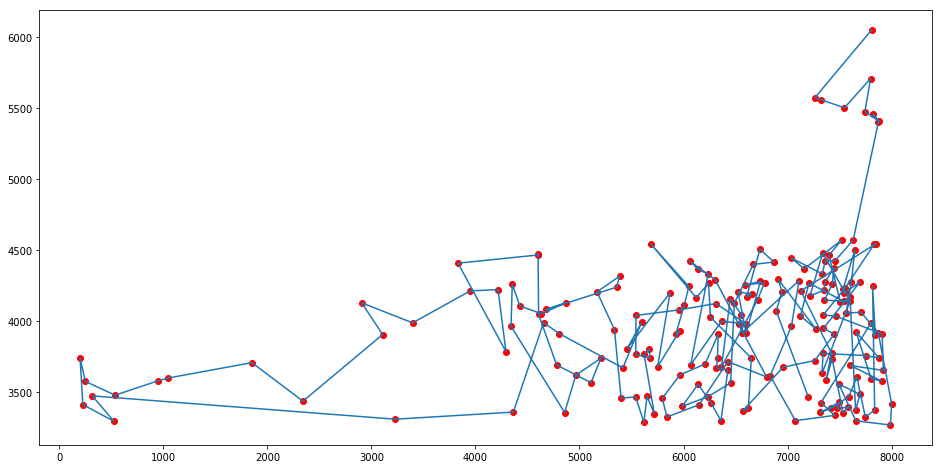

Best individual is number 696 with a fitness of 63031.13110434697
Average fitness is 66907.00642492996


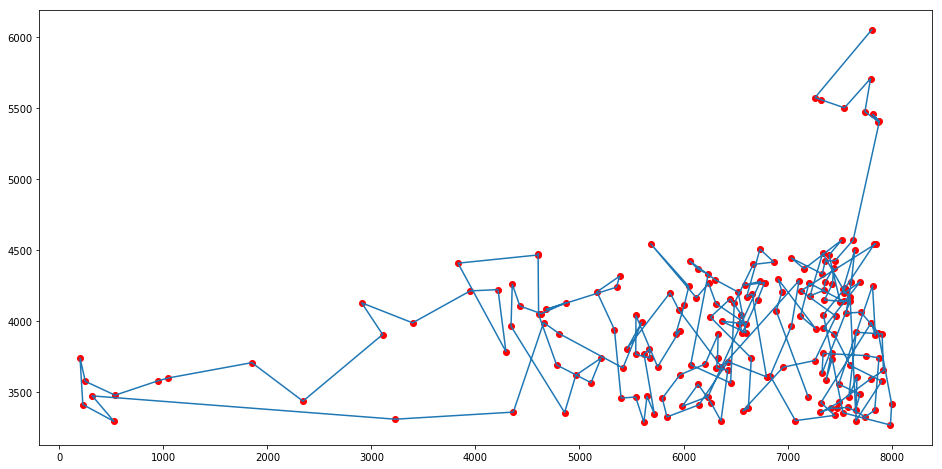

Best individual is number 356 with a fitness of 62826.45628751089
Average fitness is 66722.44888983345


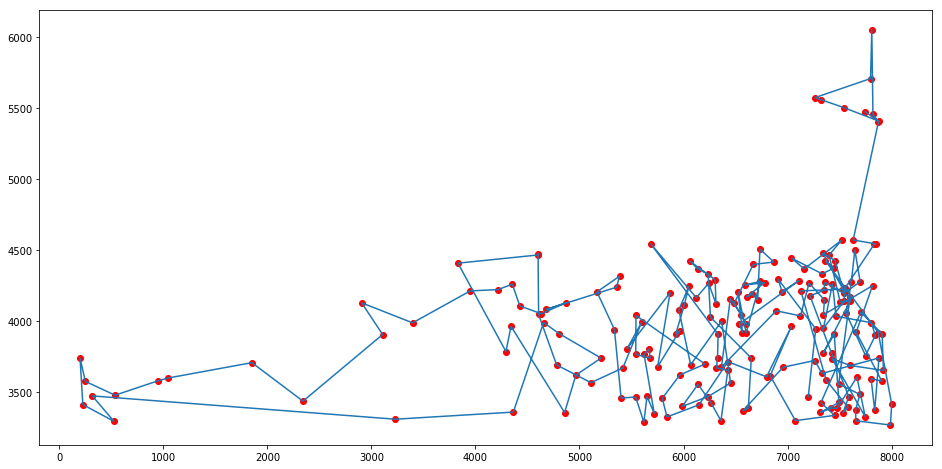

In [30]:
bxplot=list()
bxplot[:]=[]

max_iterations=max_iterations

f = FloatProgress(min=0, max=max_iterations) # instantiate the bar
display(f) # display the bar
f.value=0

for j in range(0,max_iterations):
    #initialize empty population
    tmp_population=np.zeros((nindividuals,ncities),dtype=int)
    
    bxpltseries=list()
    bxpltseries[:]=[]
    
    for i in range(0,nindividuals):
        tmp=tournament_selection(population,5)
        tmp_fitness = calculate_fitness(tmp)
        #print(tmp_fitness)
        bxpltseries.append(tmp_fitness)
        #print(tmp)
        #print(tmp.shape)
        tmp2=mutate(tmp)
        tmp_population[i]=tmp2[:]
     
    
    if j%15==0:
        bxplot.append(bxpltseries)
        draw_scatter_plot()
    
    population=tmp_population[:]
    f.value += 1
    
f.close() #hide progressbar

### Visualize the resulting fitnesses

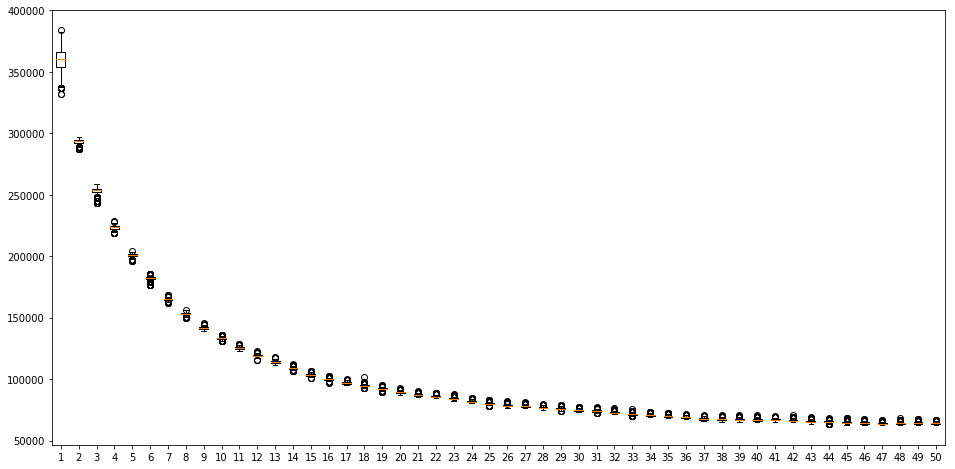

In [31]:
plt.pyplot.boxplot(bxplot)

plt.pyplot.show()